[-3.         -2.68421053 -2.36842105 -2.05263158 -1.73684211 -1.42105263
 -1.10526316 -0.78947368 -0.47368421 -0.15789474  0.15789474  0.47368421
  0.78947368  1.10526316  1.42105263  1.73684211  2.05263158  2.36842105
  2.68421053  3.        ]
[[-2.95659506 -2.72163061]
 [-3.07548241 -2.10471882]
 [-3.49528114 -2.77742078]
 ...
 [ 3.07332917  2.07118296]
 [ 2.73308088  2.23992658]
 [ 3.16789363  2.77245157]]
<class 'numpy.ndarray'>


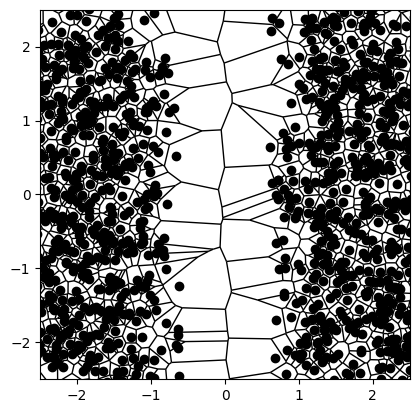

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay

# Let's generate a more complex set of points and compute the Voronoi diagram and Delaunay triangulation for them

# Generating random points within a bounded region
np.random.seed(100) # Seed for reproducibility
num_points = 15

y_values = np.linspace(-2.5, 2.5, 100)  # You can adjust the range and number of points as needed

x_low = -1
x_high = 1

# Generate x-values that omit points between a and b
x_values = np.linspace(-3, 3, 20)


print(x_values)
# Initialize an empty list to store points
all_points = []

randomizer = 0.5

# Loop through each x location and create points
for x in x_values:
    if (x > x_low) and (x < x_high):
        pass
    else:
        temp_points = np.array([[x + np.random.uniform(-randomizer, randomizer), y + np.random.uniform(-randomizer, randomizer)] for y in y_values])
        all_points.append(temp_points)

# Concatenate all the arrays of points into a single array
points = np.vstack(all_points)


print(points)


print(type(points))



# Compute Voronoi diagram
vor = Voronoi(points)
# Compute Delaunay triangulation
tri = Delaunay(points)

# Plotting
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=False)
ax.plot(points[:, 0], points[:, 1], 'ko')
# ax.triplot(points[:, 0], points[:, 1], tri.simplices, 'go-')

# Configure the plot
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [2]:
from perlin_noise_generator import generate_binary_perlin_noise, plot_2d, plot_3d

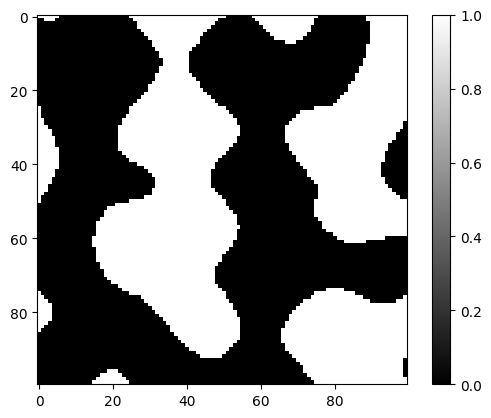

[[1 1 1 ... 1 1 1]
 [0 0 1 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


In [3]:
pic_2d = generate_binary_perlin_noise([100,100], 4)

plot_2d(pic_2d)

# Assuming pic_2d contains your generated noise
pic_array = np.array(pic_2d)


print(pic_array)


In [9]:
import numpy as np

def transform_coordinates(pic_array):
    nrows, ncols = pic_array.shape
    transformed_coordinates = []

    # Define the scaling function
    scale = lambda x, max_val: (x / max_val) * 100

    for y in range(nrows):
        for x in range(ncols):
            if pic_array[y, x] == 1:
                # Apply the scaling to each coordinate
                transformed_x = scale(x, ncols - 1)
                transformed_y = scale(y, nrows - 1)
                transformed_coordinates.append([transformed_x, transformed_y])

    return np.array(transformed_coordinates)

# Example usage
pic_array = np.array([[1, 1, 1], [0, 0, 1], [0, 0, 0]])
transformed = transform_coordinates(pic_array)
print(transformed)


[[  0.   0.]
 [ 50.   0.]
 [100.   0.]
 [100.  50.]]


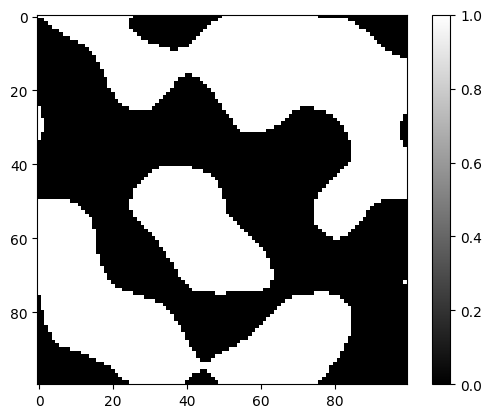

[[1 1 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[  0.           0.        ]
 [  1.01010101   0.        ]
 [  2.02020202   0.        ]
 ...
 [ 73.73737374 100.        ]
 [ 74.74747475 100.        ]
 [ 75.75757576 100.        ]]


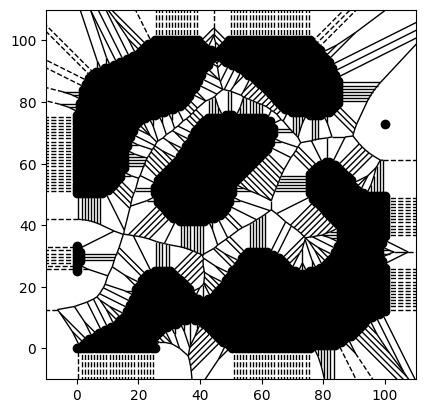

In [12]:
pic_2d = generate_binary_perlin_noise([100,100], 4)

plot_2d(pic_2d)

# Assuming pic_2d contains your generated noise
pic_array = np.array(pic_2d)


print(pic_array)


points = transform_coordinates(pic_array)

print(points)


# Compute Voronoi diagram
vor = Voronoi(points)
# Compute Delaunay triangulation
tri = Delaunay(points)

# Plotting
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=False)
ax.plot(points[:, 0], points[:, 1], 'ko')
# ax.triplot(points[:, 0], points[:, 1], tri.simplices, 'go-')

# Configure the plot
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

